There are various preprocessing techniques available:

-  Uniform Aspect Ratio 
(most models assume square shape of images >> cropping, centering)
- Uniform Image Size
(ensuring batch of images have the same hight and width >> dowscaling/upscaling)
- Mean and Pertubed Images 
(mean image: average pixel across the entire dataset; pertubed: distort pixels by varying them from the mean image >> prevent CNN from focusing on center)
- Normalized Image Inputs
(centing pixel values around zero mean: subtracting mean and devide by standar deviation >>
ensuring that each pixel has similar data distribution)
- Dimensionality Reduction
(3 channel reduce to 1 channel >> reduce the size of the problem, so the training works faster)
- Data Augmentation
(scaling, rotations, affine transforms)

In [1]:
import skimage
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Reading an image
bird = mpimg.imread("datasets/images/bird.jpeg")

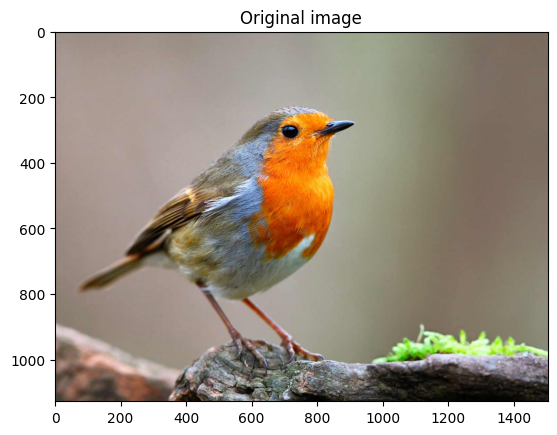

In [3]:
plt.title("Original image")
plt.imshow(bird)

In [4]:
bird.shape

(1128, 1504, 3)

In [5]:
bird

array([[[157, 144, 135],
        [157, 144, 135],
        [157, 144, 135],
        ...,
        [122, 106,  93],
        [122, 106,  93],
        [122, 106,  93]],

       [[157, 144, 135],
        [157, 144, 135],
        [157, 144, 135],
        ...,
        [122, 106,  93],
        [122, 106,  93],
        [122, 106,  93]],

       [[157, 144, 135],
        [157, 144, 135],
        [157, 144, 135],
        ...,
        [122, 106,  93],
        [122, 106,  93],
        [122, 106,  93]],

       ...,

       [[ 77,  69,  58],
        [ 77,  69,  58],
        [ 76,  68,  57],
        ...,
        [ 36,  29,  13],
        [ 39,  32,  14],
        [ 40,  33,  15]],

       [[ 78,  70,  59],
        [ 77,  69,  58],
        [ 77,  69,  58],
        ...,
        [ 33,  26,  10],
        [ 32,  25,   7],
        [ 31,  24,   6]],

       [[ 78,  70,  59],
        [ 78,  70,  59],
        [ 77,  69,  58],
        ...,
        [ 31,  24,   8],
        [ 28,  21,   3],
        [ 26,  19,   1]]

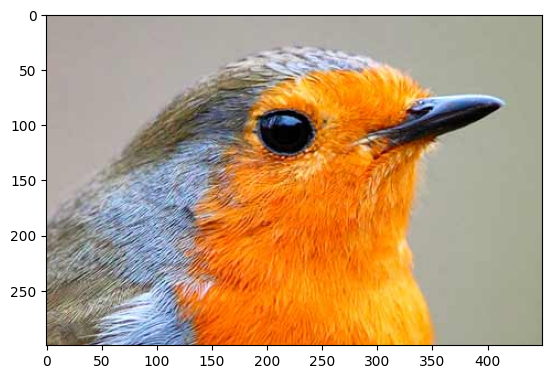

In [6]:
# Extracting portion of an image
sliced = bird[200:500, 500:950]
plt.imshow(sliced)

In [7]:
# re-shaping  >> separating out 3 channels
bird_reshaped = bird.reshape(bird.shape[0], -1) #-1 : value is inferred from the array length and remaining dimensions

print("bird.shape:", bird.shape)
print("bird_reshaped.shape:", bird_reshaped.shape)

bird.shape: (1128, 1504, 3)
bird_reshaped.shape: (1128, 4512)


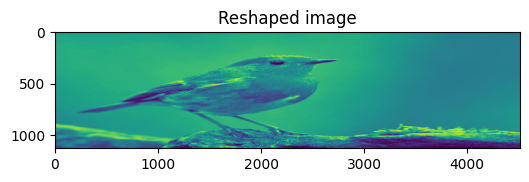

In [8]:
plt.figure(figsize=(6,6))
plt.title("Reshaped image")
plt.imshow(bird_reshaped)

In [9]:
# Resizing
bird_resized = skimage.transform.resize(bird, (300,300))
bird_resized.shape

(300, 300, 3)

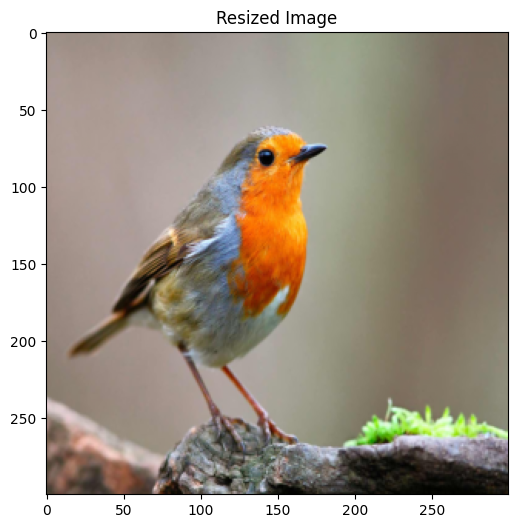

In [10]:
plt.figure(figsize=(6,6))
plt.title("Resized Image")
plt.imshow(bird_resized)

In [11]:
aspect_ratio_original = bird.shape[1]/float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1]/float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  1.3333333333333333
Resized aspect ratio:  1.0


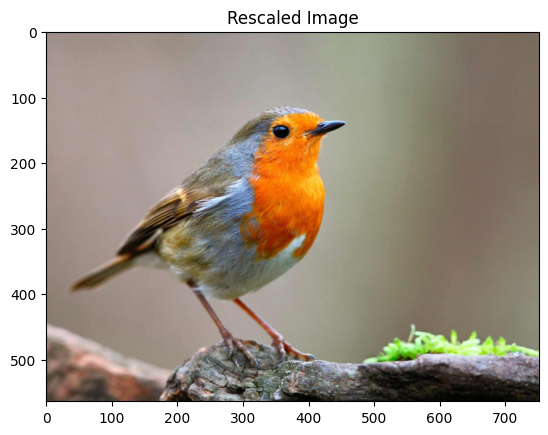

In [12]:
# Rescaling image so that original aspect ratio is preserved
bird_rescaled = skimage.transform.rescale(bird, 0.5, channel_axis=2)

# Displaying rescaled image
plt.figure()
plt.title("Rescaled Image")
plt.imshow(bird_rescaled)

In [13]:
aspect_ratio_original = bird.shape[1]/float(bird.shape[0])
aspect_ratio_rescaled = bird_rescaled.shape[1]/float(bird_rescaled.shape[0])

print("Original shape: ", bird.shape)
print("Rescaled shape: ", bird_rescaled.shape)

print("Original aspect ratio: ", aspect_ratio_original)
print("Rescaled aspect ratio: ", aspect_ratio_rescaled)

Original shape:  (1128, 1504, 3)
Rescaled shape:  (564, 752, 3)
Original aspect ratio:  1.3333333333333333
Rescaled aspect ratio:  1.3333333333333333


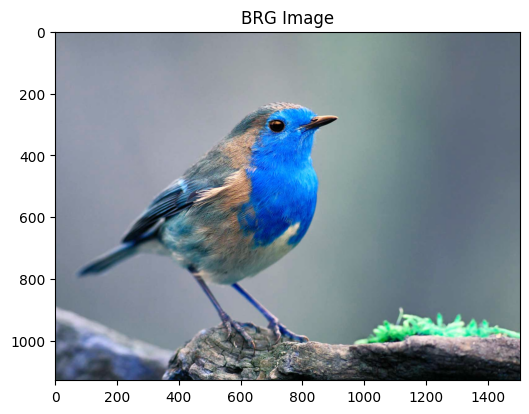

In [14]:
# Swithing around the order of channels
# [height, width, (R,G,B)] >> [height, width, (B,G,R)]
bird_BGR = bird[:, :, (2, 1, 0)]

# Displaying BRG image
plt.figure(figsize=(6,6))
plt.title("BRG Image")
plt.imshow(bird_BGR)  # matplotlib assumes RGB format, that's why the image is stragenly colored

In [15]:
bird_BGR.shape

(1128, 1504, 3)

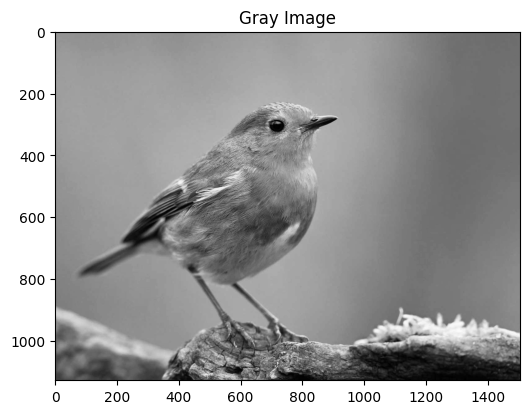

In [16]:
# Converting to gray scale
bird_gray = skimage.color.rgb2gray(bird)

# Displaying gray image
plt.figure(figsize=(6,6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap='gray') 

In [17]:
bird_gray.shape # it is a single channel image

(1128, 1504)

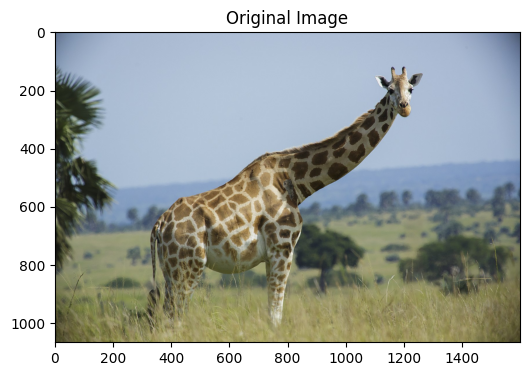

In [18]:
# Reading an image
image_path = "datasets/images/giraffe.jpeg"
giraffe = skimage.img_as_float(skimage.io.imread(image_path)).astype(np.float32)

# Displaying original image
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(giraffe)

In [19]:
giraffe.shape

(1066, 1599, 3)

In [20]:
giraffe

array([[[0.36078432, 0.42745098, 0.5294118 ],
        [0.3647059 , 0.43137255, 0.53333336],
        [0.3647059 , 0.43137255, 0.53333336],
        ...,
        [0.27450982, 0.32941177, 0.43529412],
        [0.27058825, 0.3254902 , 0.43137255],
        [0.27058825, 0.3254902 , 0.43137255]],

       [[0.3647059 , 0.43137255, 0.53333336],
        [0.3647059 , 0.43137255, 0.53333336],
        [0.3647059 , 0.43137255, 0.53333336],
        ...,
        [0.28235295, 0.3372549 , 0.44313726],
        [0.2784314 , 0.33333334, 0.4392157 ],
        [0.2784314 , 0.33333334, 0.4392157 ]],

       [[0.3647059 , 0.43137255, 0.53333336],
        [0.3647059 , 0.43137255, 0.53333336],
        [0.36862746, 0.43529412, 0.5372549 ],
        ...,
        [0.28235295, 0.3372549 , 0.44313726],
        [0.2784314 , 0.33333334, 0.4392157 ],
        [0.2784314 , 0.33333334, 0.4392157 ]],

       ...,

       [[0.23921569, 0.24313726, 0.11764706],
        [0.24705882, 0.2509804 , 0.1254902 ],
        [0.25490198, 0

In [47]:
def crop(image, cropx, cropy):
    x, y, c = image.shape
    
    startx = x//2 - (cropx//8)
    starty = y//8 - (cropy//3)
    
    stopx = startx + 3*cropx
    stopy = starty + 2*cropy
    
    return image[starty:stopy, startx:stopx]

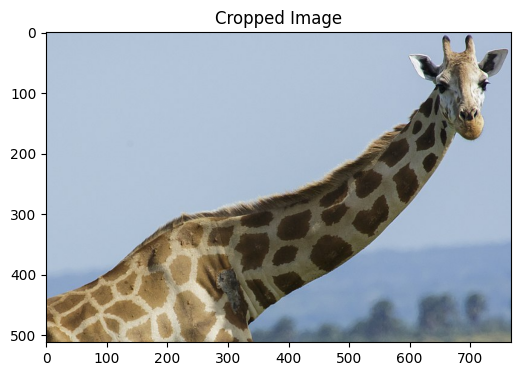

In [48]:
giraffe_cropped = crop(giraffe, 256, 256)

# Displaying cropped image
plt.figure(figsize=(6,6))
plt.title("Cropped Image")
plt.imshow(giraffe_cropped)

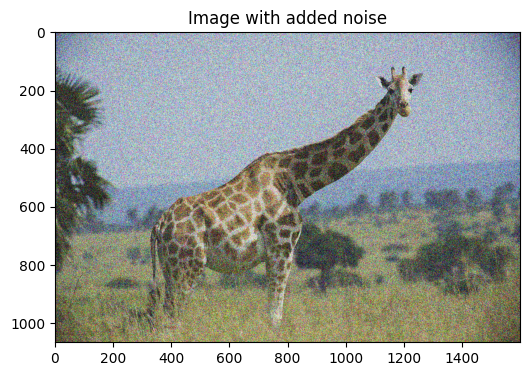

In [66]:
# To see how to denoise the image, let's add some noise fisrt
from skimage.util import random_noise

sigma = 0.333
noisy_giraffe = random_noise(giraffe, var=sigma**2)

# Displaying noisy image
plt.figure(figsize=(6,6))
plt.title("Image with added noise")
plt.imshow(noisy_giraffe)

In [56]:
# Importing de-noising filters
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [69]:
# Estimating noise
sigma_est = estimate_sigma(noisy_giraffe, 
                           #multichannel=True,
                           channel_axis = 2,
                           average_sigmas=True)

sigma_est

0.27737104941913154

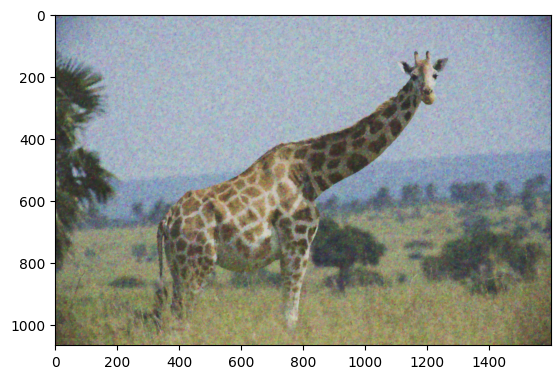

In [72]:
# Denoising image
plt.imshow(denoise_tv_chambolle(noisy_giraffe, 
                                weight=0.2,
                                channel_axis=2))

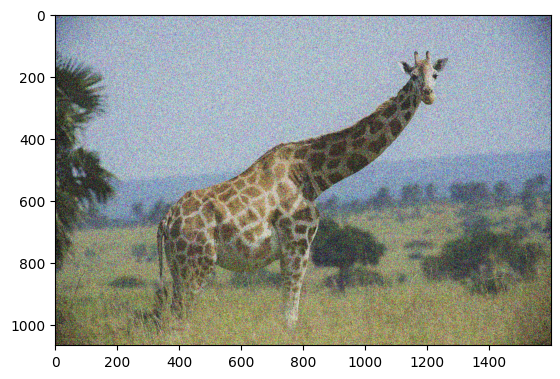

In [73]:
plt.imshow(denoise_bilateral(noisy_giraffe, 
                             sigma_color=0.05,
                             sigma_spatial=15,
                             channel_axis=2))

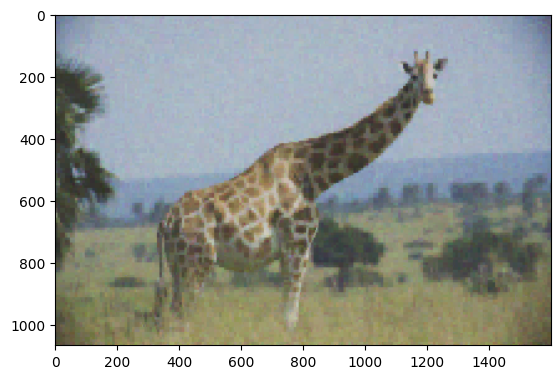

In [74]:
plt.imshow(denoise_wavelet(noisy_giraffe, channel_axis=2))

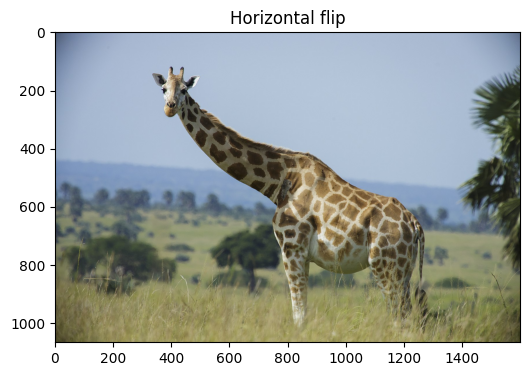

In [75]:
# Flipping the image (can be used for flipping text to further apply OCR)
giraffe_flip = np.fliplr(giraffe)

# Displaying noisy image
plt.figure(figsize=(6,6))
plt.title("Horizontal flip")
plt.imshow(giraffe_flip)